[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/How-to-Learn-to-Code/python-class/blob/master/Lesson_5_Pandas_DataFrame/Lesson5_pandas_DataFrame_Teacher.ipynb)

# Lesson 5: Pandas and DataFrames

## Learning Objectives:

Students will gain a better understanding of how to use `pandas` for manipulating data.

* [Introduction to `pandas`](#intro)
* [Loading and Slicing `DataFrame`s](#dataframes)
* [Joining `DataFrame`s](#joining)
* [Conditional Subsetting](#conditional)
* [Statistics and Plotting in `pandas`](#stats)
* [In-Class Exercises](#exercises)

### Introduction to `pandas` <a id='intro'></a>

In our last class, we discussed the basics of how to read and write files, allowing us to use any data we have. When we're using data that is structured in a specific way, it usually difficult to use and manipulate the text directly. Instead, some functions and modules implement an application programming interface (API) that allows us to better use the data.

In this lesson, we'll be downloading and using a CSV file (.csv), which stands for "comma separate value". If you look at this file's text, you'll see a tabular structure, resembling something like
```
day,temperature,wind_speed,humidity
1/1/2024,25,10,50
1/2/2024,26,12,55
1/3/2024,27,11,59
1/4/2024,28,13,54
```

Instead of using the data like this, we'll load in data with a module named `pandas` using the function `read_csv`. This will give us an object called a `DataFrame`. Basically, this is a two-dimensional table of rows and columns. 

This is useful in terms of allowing us to visualize our data, but most users will want to utilize the data for their own research purposes. Therefore, users will find it helpful to use other functions in `pandas` to help analyze or manipulate the data.

#### Setup

First, we need to install the `pandas` and some other libraries onto our Google Colab environment. The following cell will install the necessary libraries, but we can't quite use them yet.

In [ ]:
%pip install pandas 
%pip install matplotlib

In order to use the libraries, we need to import them. This will bring the libraries into our current notebook so that we can actively use them.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

For this lesson, we'll be using daily weather history data from multiple U.S. cities from July 2014 - June 2015 (from FiveThirtyEight's public repository of data found here: https://github.com/fivethirtyeight/data/tree/master/us-weather-history). The next cell will download the data and save it to files named `KPHL.csv` and `KSEA.csv`.

In [14]:
!wget https://raw.githubusercontent.com/fivethirtyeight/data/master/us-weather-history/KPHL.csv
!wget https://raw.githubusercontent.com/fivethirtyeight/data/master/us-weather-history/KSEA.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 20560  100 20560    0     0  16468      0  0:00:01  0:00:01 --:--:-- 16474
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 20603  100 20603    0     0  54682      0 --:--:-- --:--:-- --:--:-- 54795


### Loading and Slicing `DataFrame`s <a id='dataframes'></a>

The first set of data we are going to read in is from Philadelphia (`KPHL.csv`). We will use the `pandas` library to read in the data and display the first few rows of the data.

In [50]:
philly_weather = pd.read_csv('KPHL.csv', index_col='date')
print(philly_weather.shape)
philly_weather.head()

(365, 12)


,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
date,,,,,,,,,,,,
2014-7-1,83,72,93,68,86,52,102,1988,1901,0.00,0.13,1.04
2014-7-2,86,75,96,68,86,52,103,1965,1901,0.21,0.13,1.73
2014-7-3,83,74,92,68,87,54,104,1957,1966,0.09,0.12,3.66
2014-7-4,73,68,78,68,87,52,103,1986,1966,0.04,0.13,2.08
2014-7-5,74,64,83,69,87,55,100,1963,1999,0.00,0.13,4.38


As you can see, the rows of this data frame represent each day during this period, and the columns represent the weather data that has been collected.

As you can see, there are numerous types of data that has been collected, including the temperatures and amount of precipitation for that day and over the years.



#### Subsetting `DataFrame`s

Often times, our data may contain extra information that we don't need at the moment. We can subset the `DataFrame` to only include the columns that we need.

In `pandas`, one of the ways you can select certain subsets of the data is to specify them by the row and/or column names. Let's say we only want to look at the actual precipitation data. We can "take a slice" of or "index into" the `DataFrame` to only look at the precipitation data.

In [7]:
philly_weather["actual_precipitation"]

date
2014-7-1     0.00
2014-7-2     0.21
2014-7-3     0.09
2014-7-4     0.04
2014-7-5     0.00
             ... 
2015-6-26    0.00
2015-6-27    1.34
2015-6-28    0.22
2015-6-29    0.00
2015-6-30    1.50
Name: actual_precipitation, Length: 365, dtype: float64

We can grab multiple columns by passing in a list of column names. For example, if we want to look at the actual, average, and record precipitation data, we can pass in a list of the column names.

In [8]:
philly_weather[["actual_precipitation", "average_precipitation", "record_precipitation"]]

,actual_precipitation,average_precipitation,record_precipitation
date,,,
2014-7-1,0.00,0.13,1.04
2014-7-2,0.21,0.13,1.73
2014-7-3,0.09,0.12,3.66
2014-7-4,0.04,0.13,2.08
2014-7-5,0.00,0.13,4.38
...,...,...,...
2015-6-26,0.00,0.12,2.77
2015-6-27,1.34,0.10,3.27
2015-6-28,0.22,0.11,2.48


Another way of selecting these columns is to use the `loc` method, which looks for the names of the columns by labels. Since we access the table rows by columns, we include `:` to say that we want all of the rows, but only the columns with specific labels. 

In [9]:
philly_weather.loc[:, ["actual_precipitation", "average_precipitation", "record_precipitation"]]

,actual_precipitation,average_precipitation,record_precipitation
date,,,
2014-7-1,0.00,0.13,1.04
2014-7-2,0.21,0.13,1.73
2014-7-3,0.09,0.12,3.66
2014-7-4,0.04,0.13,2.08
2014-7-5,0.00,0.13,4.38
...,...,...,...
2015-6-26,0.00,0.12,2.77
2015-6-27,1.34,0.10,3.27
2015-6-28,0.22,0.11,2.48


Likewise, if we want specific rows, we can select the desired rows by their labels and use the colon `:` after a comma to get all the columns. 

In [10]:
philly_weather.loc[["2014-7-1", "2014-7-2"], :]

,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
date,,,,,,,,,,,,
2014-7-1,83,72,93,68,86,52,102,1988,1901,0.00,0.13,1.04
2014-7-2,86,75,96,68,86,52,103,1965,1901,0.21,0.13,1.73


Instead of just relying on the labels of the rows and/or columns, we can also use their numerical location or index. To do thisx, we can instead use the `iloc` method to select the row and/or column by index value(s). 

For instance, we can grab the first 3 rows (`0:2`) and the 10th-12th columns (`9:12`) like:

In [11]:
philly_weather.iloc[0:2, 9:12]

,actual_precipitation,average_precipitation,record_precipitation
date,,,
2014-7-1,0.00,0.13,1.04
2014-7-2,0.21,0.13,1.73


If the numbers are not in a sequence (e.g., columns 0, 5, and 7), you can get the subset of the data using a list:

In [12]:
philly_weather.iloc[:, [0, 5, 7]]

,actual_mean_temp,record_min_temp,record_min_temp_year
date,,,
2014-7-1,83,52,1988
2014-7-2,86,52,1965
2014-7-3,83,54,1957
2014-7-4,73,52,1986
2014-7-5,74,55,1963
...,...,...,...
2015-6-26,76,51,1960
2015-6-27,67,50,1965
2015-6-28,73,54,1961


### Joining `DataFrame`s <a id='joining'></a>

Of course, we might not only be interested in the data from one city or file. Imagine that we want to do side-by-side comparisons of the average precipitation in Seattle vs. Philadelphia. 

Let's first read in the weather pattern data for Seattle (`KSEA.csv`) as well.

In [15]:
seattle_weather = pd.read_csv('KSEA.csv', index_col='date')
seattle_weather.head()

,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
date,,,,,,,,,,,,
2014-7-1,77,60,94,54,73,45,94,1948,2014,0.0,0.03,0.75
2014-7-2,70,58,81,54,73,43,93,1954,2015,0.0,0.03,0.50
2014-7-3,64,57,71,54,74,44,92,1954,2015,0.0,0.03,0.47
2014-7-4,66,57,75,54,74,43,92,1949,2015,0.0,0.03,0.57
2014-7-5,66,56,76,55,74,47,91,1951,1958,0.0,0.03,0.64


Rather than having to flip between both data frames, we can instead combine them into one separate data frame using the `join` method. 

There are four different ways that we can join our data: the `left`, `right`, `inner`, and `outer` options.

For the sake demonstrating these different options, let's first subset our data to only look at the columns dealing with precipitation but grab 5 rows from each data frame. (We're using different rows for each `DataFrame` intentionally!) Then, let's sort our data with `sort_values` such that Philadelphia's data is sorted from the lowest to highest record precipitation, while Seattle's data is sorted from the highest to lowest record precipitation. 

In [43]:
philly_weather_precip = philly_weather.iloc[:5, 9:12]
seattle_weather_precip = seattle_weather.iloc[1:6, 9:12]

In [44]:
# Sort Philly weather from lowest to highest record precipitation
# Using sort_values:
# - by: column to sort by
# - axis: 0 to sort rows, 1 to sort columns
# - ascending: True to sort from low to high, False to sort from high to low
philly_weather_precip_reordered = philly_weather_precip.sort_values(by=["record_precipitation"], axis=0, ascending=True)
philly_weather_precip_reordered

,actual_precipitation,average_precipitation,record_precipitation
date,,,
2014-7-1,0.00,0.13,1.04
2014-7-2,0.21,0.13,1.73
2014-7-4,0.04,0.13,2.08
2014-7-3,0.09,0.12,3.66
2014-7-5,0.00,0.13,4.38


In [45]:
seattle_weather_precip_reordered = seattle_weather_precip.sort_values(by=["record_precipitation"], axis=0, ascending=False)
seattle_weather_precip_reordered

,actual_precipitation,average_precipitation,record_precipitation
date,,,
2014-7-5,0.0,0.03,0.64
2014-7-4,0.0,0.03,0.57
2014-7-2,0.0,0.03,0.50
2014-7-3,0.0,0.03,0.47
2014-7-6,0.0,0.03,0.44


A `left` join (the default setting) indicates that we preserve the rows of the first `DataFrame` and their order, and then puts the `DataFrame`s next to each other. Notice that the `NaN` values are filled in for the missing data.

Since the column names are the same for both dataframes, we use `lsuffix` and `rsuffix` to rename and keep track of which columns came from which dataframe.

In [56]:
# Notice that the Philly records are still increasing, but the Seattle records are out of order
philly_weather_precip_reordered.join(seattle_weather_precip_reordered, how='left', lsuffix='_philly', rsuffix='_seattle')

,actual_precipitation_philly,average_precipitation_philly,record_precipitation_philly,actual_precipitation_seattle,average_precipitation_seattle,record_precipitation_seattle
date,,,,,,
2014-7-1,0.00,0.13,1.04,NaN,NaN,NaN
2014-7-2,0.21,0.13,1.73,0.0,0.03,0.50
2014-7-4,0.04,0.13,2.08,0.0,0.03,0.57
2014-7-3,0.09,0.12,3.66,0.0,0.03,0.47
2014-7-5,0.00,0.13,4.38,0.0,0.03,0.64


Likewise, a `right` join indicates that we preserve the rows of the second `DataFrame` and their order, and then puts the `DataFrame`s next to each other. Notice that the `NaN` values are filled in for the missing data.

In [47]:
# Notice that the Seattle records are still decreasing, but the Philly records are out of order
philly_weather_precip_reordered.join(seattle_weather_precip_reordered, how='right', lsuffix='_philly', rsuffix='_seattle')

,actual_precipitation_philly,average_precipitation_philly,record_precipitation_philly,actual_precipitation_seattle,average_precipitation_seattle,record_precipitation_seattle
date,,,,,,
2014-7-5,0.00,0.13,4.38,0.0,0.03,0.64
2014-7-4,0.04,0.13,2.08,0.0,0.03,0.57
2014-7-2,0.21,0.13,1.73,0.0,0.03,0.50
2014-7-3,0.09,0.12,3.66,0.0,0.03,0.47
2014-7-6,NaN,NaN,NaN,0.0,0.03,0.44


The `outer` join will combine the two `DataFrame`s taking all of the unique rows from both `DataFrame`s. If there is no data for a specific row, the `DataFrame` will fill in `NaN` values.

In [48]:
# Notice that both records are out of order but there are 6 rows now.
philly_weather_precip_reordered.join(seattle_weather_precip_reordered, how='outer', lsuffix='_philly', rsuffix='_seattle')

,actual_precipitation_philly,average_precipitation_philly,record_precipitation_philly,actual_precipitation_seattle,average_precipitation_seattle,record_precipitation_seattle
date,,,,,,
2014-7-1,0.00,0.13,1.04,NaN,NaN,NaN
2014-7-2,0.21,0.13,1.73,0.0,0.03,0.50
2014-7-3,0.09,0.12,3.66,0.0,0.03,0.47
2014-7-4,0.04,0.13,2.08,0.0,0.03,0.57
2014-7-5,0.00,0.13,4.38,0.0,0.03,0.64
2014-7-6,NaN,NaN,NaN,0.0,0.03,0.44


The `inner` join will combine the two `DataFrame`s taking all of the rows from the `DataFrame`s such that there is no missing data.

In [49]:
# Notice that both records are out of order but there are 4 rows now.
philly_weather_precip_reordered.join(seattle_weather_precip_reordered, how='inner', lsuffix='_philly', rsuffix='_seattle')

,actual_precipitation_philly,average_precipitation_philly,record_precipitation_philly,actual_precipitation_seattle,average_precipitation_seattle,record_precipitation_seattle
date,,,,,,
2014-7-2,0.21,0.13,1.73,0.0,0.03,0.50
2014-7-4,0.04,0.13,2.08,0.0,0.03,0.57
2014-7-3,0.09,0.12,3.66,0.0,0.03,0.47
2014-7-5,0.00,0.13,4.38,0.0,0.03,0.64


### Conditional Subsetting <a id='conditional'></a>

Another useful way to subset `DataFrame`s is with conditional subsetting. This allows us to filter the data based on certain conditions that we specify. Let's say that we're only interested in days where the max temperature was greater than 90 degrees. We can use the following code to filter the data:

In [51]:
philly_weather[philly_weather["actual_max_temp"] > 90]

,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
date,,,,,,,,,,,,
2014-7-1,83,72,93,68,86,52,102,1988,1901,0.00,0.13,1.04
2014-7-2,86,75,96,68,86,52,103,1965,1901,0.21,0.13,1.73
2014-7-3,83,74,92,68,87,54,104,1957,1966,0.09,0.12,3.66
2014-7-7,84,74,93,69,87,55,103,1968,2010,0.00,0.13,2.97
2014-7-8,84,72,95,69,87,53,100,1960,1993,0.17,0.14,2.28
2014-7-13,82,72,91,69,87,57,98,1998,1994,0.05,0.14,2.80
2014-7-15,82,73,91,70,87,56,103,1940,1995,0.81,0.15,2.96
2014-7-23,83,72,93,70,87,58,101,1950,2011,0.05,0.14,3.05
2014-7-27,81,70,91,70,87,53,100,1962,1940,1.25,0.15,2.16


As another example, let's get all the days where there was no precipitation.

In [52]:
philly_weather[philly_weather["actual_precipitation"] == 0.00]

,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
date,,,,,,,,,,,,
2014-7-1,83,72,93,68,86,52,102,1988,1901,0.0,0.13,1.04
2014-7-5,74,64,83,69,87,55,100,1963,1999,0.0,0.13,4.38
2014-7-6,75,64,86,69,87,52,102,1960,2010,0.0,0.13,1.36
2014-7-7,84,74,93,69,87,55,103,1968,2010,0.0,0.13,2.97
2014-7-9,80,71,89,69,87,53,103,1963,1936,0.0,0.15,1.79
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-6-17,78,69,86,64,83,44,98,1964,1957,0.0,0.10,2.41
2015-6-22,82,73,91,66,85,48,100,1963,1988,0.0,0.11,2.47
2015-6-24,77,69,85,66,85,52,99,1947,1923,0.0,0.11,2.61


### Statistics and Plotting in `pandas` <a id='stats'></a>

Let's make a new variable containing the combined Philly and Seattle precipitation data.

In [57]:
philly_weather_precip = philly_weather.iloc[:, 9:12]
seattle_weather_precip = seattle_weather.iloc[:, 9:12]
all_precip = philly_weather_precip.join(seattle_weather_precip, how='left', lsuffix='_philly', rsuffix='_seattle')

We can perform statistics on our data as a whole using built-in mathematical functions such as `min`, `max`, or `mean`. These calculations can be performed on one or more columns of the `DataFrame`. 

For example, we can get the mean value of the actual precipitation in Seattle and Philadelphia:

In [58]:
all_precip[["actual_precipitation_seattle", "actual_precipitation_philly"]].mean()

actual_precipitation_seattle    0.102548
actual_precipitation_philly     0.124548
dtype: float64

As you can see, on average the daily precipitation in Philadelphia is only 0.02 inches greater than Seattle. 

In general, if you wanted to look at multiple statistics at once, you can call the function 'describe', as shown below:

In [59]:
all_precip[["actual_precipitation_seattle","actual_precipitation_philly"]].describe()

,actual_precipitation_seattle,actual_precipitation_philly
count,365.000000,365.000000
mean,0.102548,0.124548
std,0.241871,0.304216
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.060000,0.050000
max,2.200000,2.010000


We can also use `pandas` (and `matplotlib` which you'll learn more about in a future lesson) to help plot our data. 

Let's plot the record precipitation in Philadelphia vs. Seattle. In this case, we'll use a line plot to show the data over time.

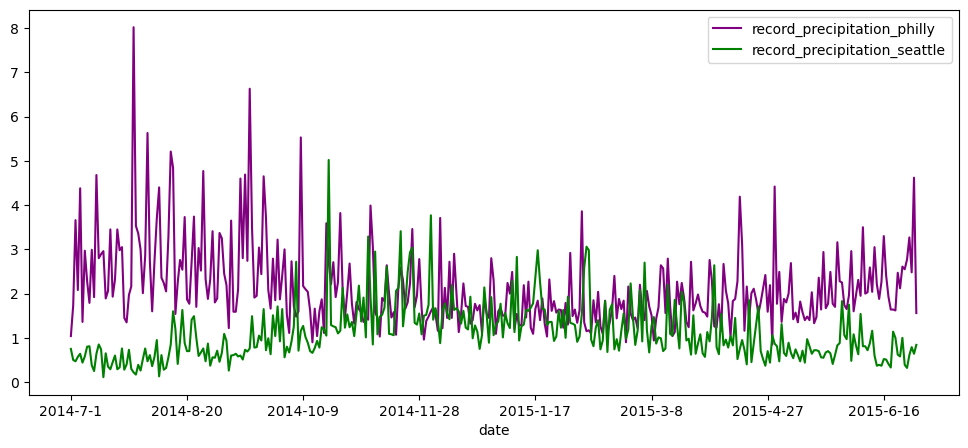

In [63]:
# Plot the Philly daily record precipitation in purple
all_precip.plot(kind='line', y='record_precipitation_philly', ax=plt.gca(), color='purple', figsize=(12,5))

# Plot the Seattle daily record precipitation in green
all_precip.plot(kind='line', y='record_precipitation_seattle', ax=plt.gca(), color='green', figsize=(12,5))

# Display the plot
# Note using plt.gca() to get the current axes allows us to plot multiple lines on the same graph
plt.show()

From this graph, we can see that months where the record precipitation was on average the highest in Philadelphia (such as August and July) are the lowest precipitation times in Seattle!

### In-Class Exercises <a id='exercises'></a>

1. Use label-based subsetting to select the precipitation data from July 1st and July 2nd, 2014, in Philadelphia.

In [ ]:
philly_weather.loc[["2014-7-1", "2014-7-2"], ["actual_precipitation", "average_precipitation", "record_precipitation"]]

2. Use index-based subsetting to select the same precipitation data as in Exercise 1.

In [ ]:
philly_weather.iloc[0:2, 9:12]

3. Use the philly_weather and seattle_weather objects to figure out which days had a record minimum tempeature under 10 in either dataset.

In [67]:
# Option 1
all_weather = philly_weather.join(seattle_weather, lsuffix='_philly', rsuffix='_seattle')
all_weather[(all_weather["record_min_temp_philly"] < 10) | (all_weather["record_min_temp_seattle"] < 10)]

# Option 2
low_philly = philly_weather[philly_weather["record_min_temp"] < 10]
low_seattle = seattle_weather[seattle_weather["record_min_temp"] < 10]
low_philly.join(low_seattle, lsuffix='_philly', rsuffix='_seattle')

,actual_mean_temp_philly,actual_min_temp_philly,actual_max_temp_philly,average_min_temp_philly,average_max_temp_philly,record_min_temp_philly,record_max_temp_philly,record_min_temp_year_philly,record_max_temp_year_philly,actual_precipitation_philly,...,actual_max_temp_seattle,average_min_temp_seattle,average_max_temp_seattle,record_min_temp_seattle,record_max_temp_seattle,record_min_temp_year_seattle,record_max_temp_year_seattle,actual_precipitation_seattle,average_precipitation_seattle,record_precipitation_seattle
date,,,,,,,,,,,,,,,,,,,,,
2014-11-30,51,42,59,35,50,8,73,1875,1933,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-3,44,40,48,34,49,9,68,1976,1950,0.11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-9,41,37,45,32,47,6,70,1876,1966,0.66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-10,40,36,43,32,46,4,71,1876,1966,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-11,36,33,38,31,46,8,65,1880,1971,0.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-3-10,46,32,59,33,51,7,76,1984,2006,0.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-3-13,40,30,49,33,52,8,84,1888,1990,0.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-3-19,37,28,46,35,54,9,78,1876,1918,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


4. Using the `all_precip` object, find the difference in both the mean and standard deviation of average precipitation between Philadelphia and Seattle.

In [74]:
mean_diff = all_precip["average_precipitation_philly"].mean() - all_precip["average_precipitation_seattle"].mean()
print(f'The difference in means is {mean_diff:.3f}.')

std_diff = all_precip["average_precipitation_philly"].std() - all_precip["average_precipitation_seattle"].std()
print(f'The difference in standard deviations is {std_diff:.3f}.')

The difference in means is 0.011.
The difference in standard deviations is -0.047.
